In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv('Physical_Activity_Monitoring_unlabeled.csv')

In [3]:
df.head()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    530560 non-null  float64
 2   handAcc16_1        530560 non-null  float64
 3   handAcc16_2        530560 non-null  float64
 4   handAcc16_3        530560 non-null  float64
 5   handAcc6_1         530560 non-null  float64
 6   handAcc6_2         530560 non-null  float64
 7   handAcc6_3         530560 non-null  float64
 8   handGyro1          530560 non-null  float64
 9   handGyro2          530560 non-null  float64
 10  handGyro3          530560 non-null  float64
 11  handMagne1         530560 non-null  float64
 12  handMagne2         530560 non-null  float64
 13  handMagne3         530560 non-null  float64
 14  handOrientation1   530560 non-null  float64
 15  handOrientation2   530560 non-null  float64
 16  ha

In [5]:
df.describe()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,534601.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,...,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,534601.000000
mean,1593.538159,32.451221,-4.435286,3.241949,4.079375,-4.375896,3.218250,4.262513,-0.008852,0.028801,...,-0.031911,0.002304,-28.756284,2.115624,14.723345,0.360159,-0.091093,0.303517,-0.173845,4.558615
std,1243.906483,1.754847,7.062004,7.224031,3.831257,7.068961,6.864782,3.822053,1.160112,0.926832,...,0.618840,2.036102,19.303887,22.253170,17.907491,0.301254,0.559400,0.344271,0.466304,2.318076
min,37.660000,27.500000,-114.755000,-82.550900,-73.949700,-61.214700,-61.824200,-61.577100,-19.690500,-7.609010,...,-7.701040,-14.019600,-172.865000,-136.951000,-102.716000,0.000003,-0.954848,-0.876838,-0.997040,1.000000
25%,475.500000,31.312500,-9.076360,0.682775,1.588777,-8.981072,0.687587,1.780160,-0.153182,-0.083315,...,-0.049003,-0.221911,-39.689950,-10.960850,2.252230,0.145023,-0.676392,0.006839,-0.580040,2.000000
50%,827.610000,32.875000,-5.465610,3.089205,4.157125,-5.434845,3.127145,4.413625,-0.004439,0.004013,...,-0.004481,0.000354,-26.285600,-0.014372,16.599500,0.240996,0.000000,0.322698,-0.281681,5.000000
75%,2876.990000,33.812500,0.383679,5.559742,6.864212,0.424770,5.592180,7.148178,0.130310,0.094342,...,0.048972,0.032649,-14.549500,19.245900,25.947100,0.501671,0.410052,0.594198,0.252247,7.000000
max,4007.730000,35.250000,60.912600,155.532000,78.480100,34.159400,62.259800,60.843700,22.960000,11.862600,...,6.002540,14.482700,41.764800,92.867000,122.521000,1.000000,0.959538,0.920506,0.996105,8.000000


In [6]:
df['subject_id'].value_counts()

subject_id
5    76793
8    73047
6    70240
1    69882
2    68740
4    63740
7    62115
3    50044
Name: count, dtype: int64

данные для 8 человек не по порядку

пропуски заполним средним значением 

In [7]:
cols_with_nan = df.columns[df.isna().any()].tolist()

for col in cols_with_nan:
   
    df[col] = df.groupby('subject_id')[col].transform(
        
        lambda x: x.fillna(x.mean())
    )

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    534601 non-null  float64
 2   handAcc16_1        534601 non-null  float64
 3   handAcc16_2        534601 non-null  float64
 4   handAcc16_3        534601 non-null  float64
 5   handAcc6_1         534601 non-null  float64
 6   handAcc6_2         534601 non-null  float64
 7   handAcc6_3         534601 non-null  float64
 8   handGyro1          534601 non-null  float64
 9   handGyro2          534601 non-null  float64
 10  handGyro3          534601 non-null  float64
 11  handMagne1         534601 non-null  float64
 12  handMagne2         534601 non-null  float64
 13  handMagne3         534601 non-null  float64
 14  handOrientation1   534601 non-null  float64
 15  handOrientation2   534601 non-null  float64
 16  ha

Теперь создадим векторы признаков, объединим показатели в разных датчиках в 1 вектор

In [8]:
df['handAcc16'] = (df['handAcc16_1']**2 + df['handAcc16_2']**2 + df['handAcc16_3']**2)**0.5
df['handAcc6'] = (df['handAcc6_1']**2 + df['handAcc6_2']**2 + df['handAcc6_3']**2)**0.5
df['handGyro'] = (df['handGyro1']**2 + df['handGyro2']**2 + df['handGyro3']**2)**0.5
df['handMagne'] = (df['handMagne1']**2 + df['handMagne2']**2 + df['handMagne3']**2)**0.5
df['handOrientation'] = (df['handOrientation1']**2 + df['handOrientation2']**2 + df['handOrientation3']**2 + df['handOrientation4']**2 + df['handTemperature']**2)**0.5
df['chestAcc16'] = (df['chestAcc16_1']**2 + df['chestAcc16_2']**2 + df['chestAcc16_3']**2)**0.5
df['chestAcc6'] = (df['chestAcc6_1']**2 + df['chestAcc6_2']**2 + df['chestAcc6_3']**2)**0.5
df['chestGyro'] = (df['chestGyro1']**2 + df['chestGyro2']**2 + df['chestGyro3']**2)**0.5
df['chestMagne'] = (df['chestMagne1']**2 + df['chestMagne2']**2 + df['chestMagne3']**2)**0.5
df['chestOrientation'] = (df['chestOrientation1']**2 + df['chestOrientation2']**2 + df['chestOrientation3']**2 + df['chestOrientation4']**2 + df['chestTemperature']**2)**0.5
df['ankleAcc16'] = (df['ankleAcc16_1']**2 + df['ankleAcc16_2']**2 + df['ankleAcc16_3']**2)**0.5
df['ankleAcc6'] = (df['ankleAcc6_1']**2 + df['ankleAcc6_2']**2 + df['ankleAcc6_3']**2)**0.5
df['ankleGyro'] = (df['ankleGyro1']**2 + df['ankleGyro2']**2 + df['ankleGyro3']**2)**0.5
df['ankleMagne'] = (df['ankleMagne1']**2 + df['ankleMagne2']**2 + df['ankleMagne3']**2)**0.5
df['ankleOrientation'] = (df['ankleOrientation1']**2 + df['ankleOrientation2']**2 + df['ankleOrientation3']**2 + df['ankleOrientation4']**2 + df['ankleTemperature']**2)**0.5


удалим признаки 

In [9]:
df = df.drop(
    columns = [
        'handAcc16_1','handAcc16_2','handAcc16_3','handAcc6_1','handAcc6_2','handAcc6_3',
        'handGyro1','handGyro2','handGyro3','handMagne1','handMagne2','handMagne3',
        'handOrientation1','handOrientation2','handOrientation3', 'handOrientation4', 'handTemperature',
        'chestAcc16_1','chestAcc16_2','chestAcc16_3','chestAcc6_1','chestAcc6_2','chestAcc6_3',
        'chestGyro1','chestGyro2','chestGyro3','chestMagne1','chestMagne2','chestMagne3',
        'chestOrientation1','chestOrientation2','chestOrientation3', 'chestOrientation4', 'chestTemperature',
        'ankleAcc16_1','ankleAcc16_2','ankleAcc16_3','ankleAcc6_1','ankleAcc6_2','ankleAcc6_3',
        'ankleGyro1','ankleGyro2','ankleGyro3','ankleMagne1','ankleMagne2','ankleMagne3',
        'ankleOrientation1','ankleOrientation2','ankleOrientation3', 'ankleOrientation4', 'ankleTemperature'
    ]
)

# смотрим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         534601 non-null  float64
 1   subject_id        534601 non-null  int64  
 2   handAcc16         534601 non-null  float64
 3   handAcc6          534601 non-null  float64
 4   handGyro          534601 non-null  float64
 5   handMagne         534601 non-null  float64
 6   handOrientation   534601 non-null  float64
 7   chestAcc16        534601 non-null  float64
 8   chestAcc6         534601 non-null  float64
 9   chestGyro         534601 non-null  float64
 10  chestMagne        534601 non-null  float64
 11  chestOrientation  534601 non-null  float64
 12  ankleAcc16        534601 non-null  float64
 13  ankleAcc6         534601 non-null  float64
 14  ankleGyro         534601 non-null  float64
 15  ankleMagne        534601 non-null  float64
 16  ankleOrientation  53

Удаляем идентификатор субъекта, так как для дальнейших исследований он не нужен

In [10]:
features = df.drop(columns=['subject_id'])

Для сравнения моделей отберем 10% данных, сохранив соотношение количества сэмплов между субъектами

Нанем обучению модели с метода K-Means

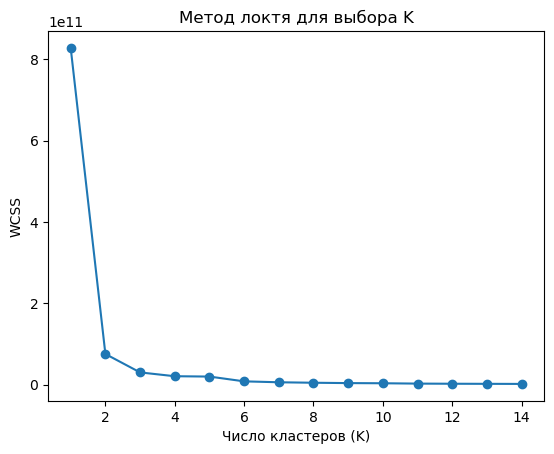

In [11]:
# Создадим вектор признаков
X = features

# Считаем WCSS для разных K
wcss = []
K_values = range(1, 15)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ -- сумма квадратов расстояний точек до центроидов

# Строим график
plt.plot(K_values, wcss, marker='o', linestyle='-')
plt.xlabel("Число кластеров (K)")
plt.ylabel("WCSS")
plt.title("Метод локтя для выбора K")
plt.show()

По графику видно, что оптимально 4-6 кластеров. Посчитаем оценку для нашей выборки

In [15]:
from sklearn.metrics import silhouette_score

k_values = [4, 5, 6]
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores[k] = score
    print(f"K = {k}, Silhouette Score: {score:.4f}")

K = 4, Silhouette Score: 0.7789
K = 5, Silhouette Score: 0.7164
K = 6, Silhouette Score: 0.5957


Лучший результат с к=4

Попробуем Плотностная кластеризация (DBSCAN)

нормализуем данные

In [12]:
std = MinMaxScaler()
X_std = std.fit_transform(features)

Определим оптимальное значение параметра eps

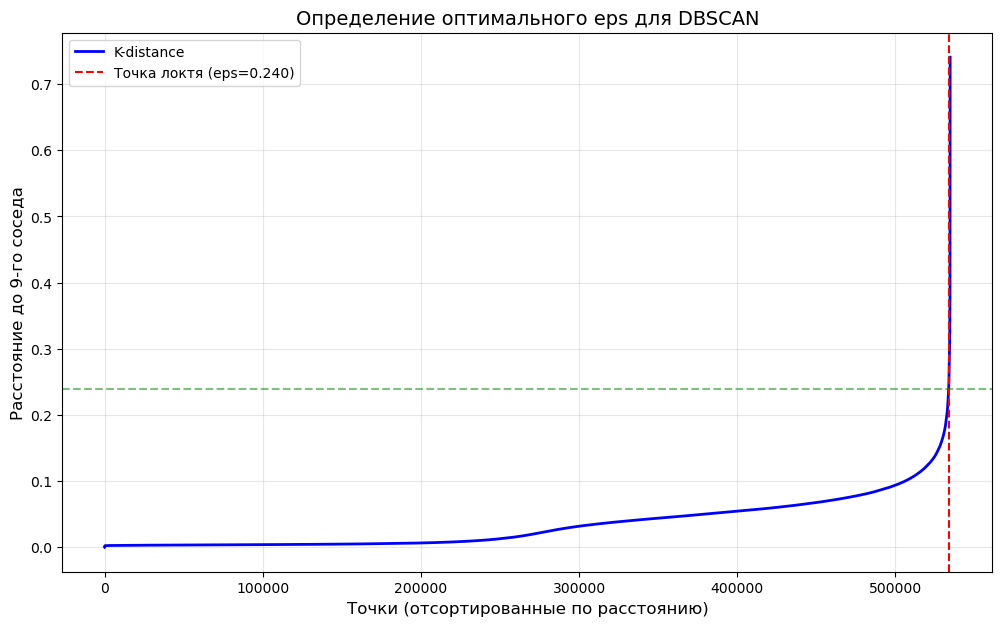

Рекомендуемое значение eps: 0.2399


In [19]:

from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

def find_optimal_eps(X, min_samples=5, plot=True):
    """
    Находит оптимальное значение eps для DBSCAN с помощью метода локтя.
    
    Параметры:
    X - стандартизированные данные
    min_samples - минимальное количество соседей (аналог minPts)
    plot - отображать график
    
    Возвращает:
    Оптимальное значение eps
    """
    # Вычисляем расстояния до k ближайших соседей
    n_neighbors = min_samples * 2 - 1
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='kd_tree').fit(X)
    distances, _ = nbrs.kneighbors(X)
    
    # Берем расстояние до k-го соседа
    k_distances = np.sort(distances[:, n_neighbors-1])
    
    # Находим точку локтя автоматически
    kneedle = KneeLocator(np.arange(len(k_distances)), 
                         k_distances, 
                         curve='convex', 
                         direction='increasing')
    
    optimal_eps = k_distances[kneedle.elbow] if kneedle.elbow else k_distances[-1]*0.5
    
    if plot:
        plt.figure(figsize=(12, 7))
        plt.plot(k_distances, linewidth=2, color='blue', label='K-distance')
        plt.xlabel("Точки (отсортированные по расстоянию)", fontsize=12)
        plt.ylabel(f"Расстояние до {n_neighbors}-го соседа", fontsize=12)
        plt.title("Определение оптимального eps для DBSCAN", fontsize=14)
        
        if kneedle.elbow:
            plt.axvline(kneedle.elbow, color='red', linestyle='--', 
                       label=f'Точка локтя (eps={optimal_eps:.3f})')
            plt.axhline(optimal_eps, color='green', linestyle='--', alpha=0.5)
        
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()
    
    return optimal_eps

# Пример использования:
# X_std - стандартизированные данные
optimal_eps = find_optimal_eps(X_std, min_samples=5)
print(f"Рекомендуемое значение eps: {optimal_eps:.4f}")

Хоть и показывает,что лучший результат 0.2399,лучше использовать по визуальным данным - 0.13


In [ ]:
# инициализируем DBSCAN
dbscan = DBSCAN(eps=0.13, min_samples=3)
# делаем кластеризацию
clusters_dbscan = dbscan.fit_predict(X_std)
# считаем оценку
score_dbscan = silhouette_score(X_std, clusters_dbscan)

print(f'Score DBSCAN: {score_dbscan}')

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.13, min_samples=3, algorithm='ball_tree', n_jobs=-1)  # n_jobs=-1 задействует все ядра CPU
clusters = dbscan.fit_predict(X_std)

Несмотря на попытки оптимизации (уменьшение данных через подвыборку и PCA, настройку параметров k-means), мой компьютер не справляется с обработкой — происходит перегрузка ЦП/ОЗУ и аварийное выключение. 

In [15]:
model = KMeans(n_clusters=4)

# делаем кластеризацию
clusters = model.fit_predict(X)

# добавляем колонку с кластерами
df['cluster'] = clusters
# добавляем колонку, в которую будем сохранять идентификатор активности
df['activityID'] = -1

# справочник соответствия номера кластера и идентификатора активности
dict = {}
# переменная для хранения идентификатора для следующей неизвестной активности
activityID = 1

for index, row in df.iterrows():
    if row['cluster'] in dict.keys():
        df.loc[index, 'activityID'] = dict[row['cluster']]
    else:
        dict[row['cluster']] = activityID
        df.loc[index, 'activityID'] = activityID
        activityID += 1

# Создание файла submission.csv
submission = df[['activityID']].reset_index()
submission.columns = ['Index', 'activityID']
submission.to_csv('sub10.csv', index=False)

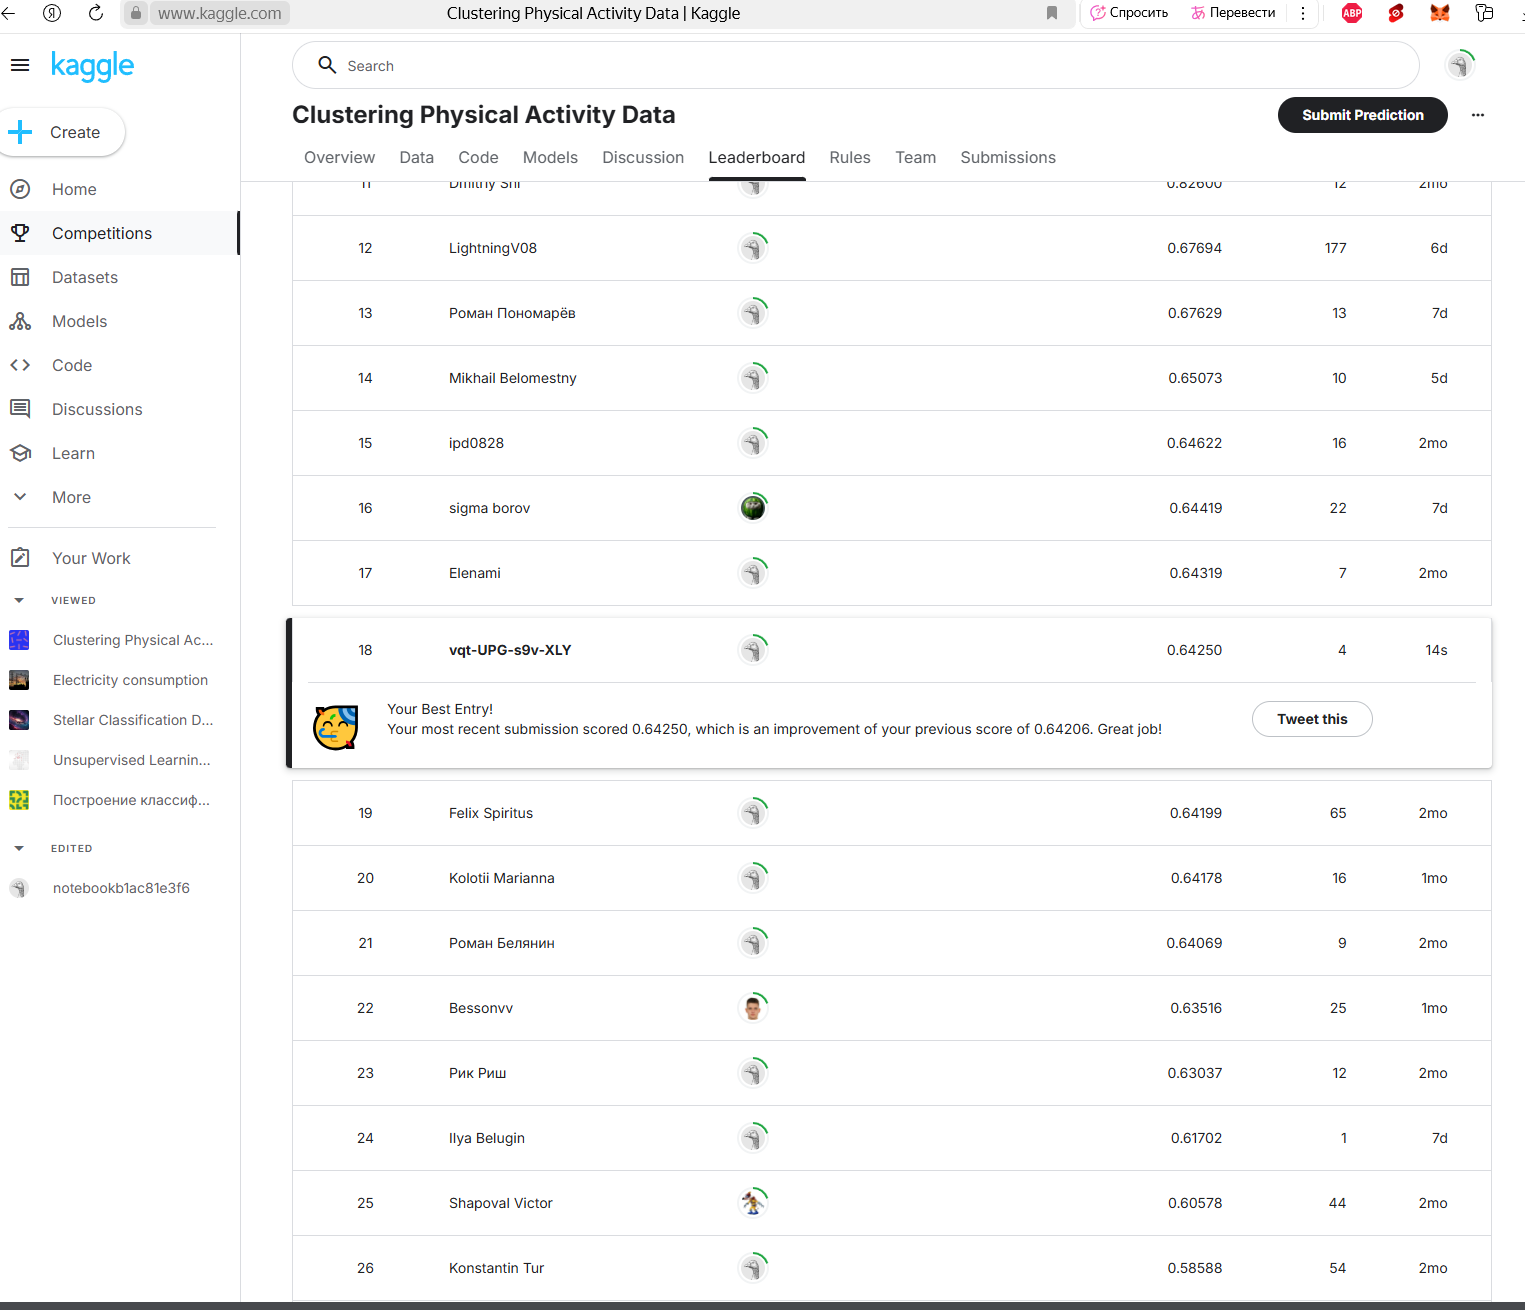

In [16]:
from IPython.display import Image, display

# Отображаем изображение из файла
display(Image(filename=r'C:\Users\NikLeo\skillfa\dz5.png'))